<a href="https://colab.research.google.com/github/parchmentmorrison-reuben/janExamMat/blob/master/Condensed_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Intro to condensed coursework 2
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
#loading data to arrays
fulldata = np.array(pd.read_csv("/content/6512233.txt",header=None,delimiter="  ")) #make sure to upload the data txt file and that it has the correct name
kcoords,energies = fulldata[:,0],fulldata[:,1:]
#kcoords is all the co-ordinates in K space in units of 1/a where a=5.43A is the lattice constant for silicon
#energies is the energies of the electron dispersion curves in units of eV

No handles with labels found to put in legend.


W1 =  0
L =  4.443981
Upside down L 1 =  10.128445
X =  16.171462
W2 =  19.758229
K = 21.535822
upside down L 2 = 28.201793


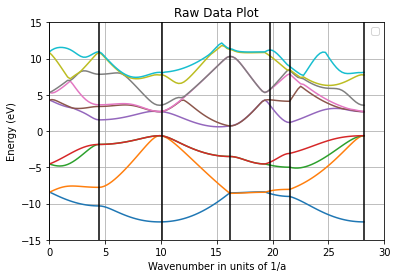

In [4]:
# ----------------- QUESTION 1 ANSWER HERE -----------------------------------
#finding lines to add to graph by bisecting data at aproximate values
#W is at wavenumber = 0
W1 = 0
print("W1 = ",W1)

#L is at 4.5 < wavenumber <5 
#L is at the local maximum of lines 9 and 10
#for line 10 finding the points where the energy drops below 10 either side of the max
wav0 = (np.where(energies[:,9] == 1.0197493e+01))
wav1 = (np.where(energies[:,9] == 1.0366077e+01))
L = kcoords[np.where(energies[:,9]==max(energies[int(wav0[0]):int(wav1[0]),9]))]
L = L[0]
print ("L = ",L)


#Upside down L is at the local maximum of lines 2 and 3 (index 1 and 2)
#upside down L seems to be at wavenumber = 10
Lprime1 = 1.0128445e+01
print("Upside down L 1 = ",Lprime1)

#X is between 15 and 17
#X is at the local maximum of line 7 (inex 6) and the meeting point of lines 1 and 2 (index 0 and 1)
#doing messy search for where lines 1 and 2 are equal
subarr = np.round((energies[:,0]-energies[:,1]),decimals=0)
indexequal = np.array(np.where(subarr==0)) #index array where lines 1 and 2 are aproximatley equal)
indexequal = indexequal[0]
X = kcoords[indexequal[2]]
print("X = ",X)

#W is the other end of the line where lines 1 and 2 are equal
W2 = kcoords[indexequal[-1]]
print("W2 = ",W2)

#K is at the local minimum of line number 6 (index 5) a turning point of line 5 (index 4) and a local maximum of line 4 and 3 (index 3 and 2)
# k is between 20 and 23
wav2 = (np.where(energies[:,4] == 2.7211778e+00))
wav3 = (np.where(energies[:,4] == 2.0133265e+00))
K = kcoords[np.where(energies[:,4] == min(energies[int(wav2[0]):int(wav3[0]),4]))]
K  = K[0]
print("K =",K)

#the second upside down L is at the end of the data 
Lprime2 = kcoords[-1]
print("upside down L 2 =", Lprime2)


#creating FULL plot with lines:
for n in range (0,10):
  plt.plot(kcoords,energies[:,n])

plt.plot((W1,W1),(-30,30),color = "black")
plt.plot((L,L),(-30,30),color = "black")
plt.plot((Lprime1,Lprime1),(-30,30),color = "black")
plt.plot((X,X),(-30,30),color = "black")
plt.plot((W2,W2),(-30,30),color = "black")
plt.plot((K,K),(-30,30),color = "black")
plt.plot((Lprime2,Lprime2),(-30,30),color = "black")

plt.grid()
plt.title("Raw Data Plot")
plt.xlabel("Wavenumber in units of 1/a")
plt.ylabel("Energy (eV)")
plt.xlim(0,30)
plt.ylim(-15,15)
plt.legend()

In [5]:
# ------------------ QUESTION 2 ---------------------
#show that W1L + LLprime1 + Lprime1X + XW2 + W2K + KLprime2
#first define position vectors for all the letters from CW1
posW = np.array([1,2,0])*np.pi
posL = np.array([1,1,1])*np.pi
posLprime = np.array([0,0,0])*np.pi
posX = np.array([0,2,0])*np.pi
posW = np.array([1,2,0])*np.pi
posK = np.array([1.5,1.5,0])*np.pi

#find magnitude of the vectors between the different positions, use np.linalg.norm function
#np.linalg.norm function returns the absolout magnitude of the norm (Frobenius Norm)
WL = np.linalg.norm(posW-posL)
LLprime = np.linalg.norm(posL - posLprime)
LprimeX = np.linalg.norm(posLprime-posX)
XW = np.linalg.norm(posX-posW)
WK = np.linalg.norm(posW-posK)
KLprime = np.linalg.norm(posK-posLprime)

#calculate total to verify its = 28.2
total = WL + LLprime + LprimeX + XW + WK + KLprime
print("WL = ",WL,"\nLLprime = ",LLprime,"\nLprimeX = ",LprimeX,"\nXW = ",XW,"\nWK = ",WK,"\nKLprime = ",KLprime)
print("The sum of all the magnitudes of the k-vectors is equal to ",np.round(total,decimals = 1))

WL =  4.442882938158366 
LLprime =  5.441398092702653 
LprimeX =  6.283185307179586 
XW =  3.141592653589793 
WK =  2.221441469079183 
KLprime =  6.664324407237549
The sum of all the magnitudes of the k-vectors is equal to  28.2


These are plots showing the slices of the data


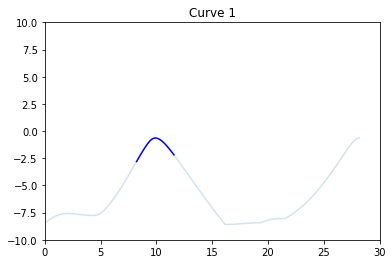

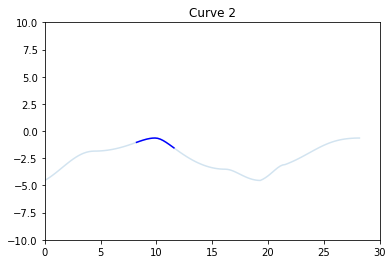

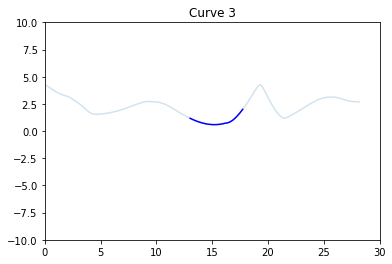

In [6]:
# ---------------- QUESTION 3 ---------------------------------------
#plan is to curvefit the three different peaks using a parabolic function
#define a parabola 
def parabola(x,a=1,b=1,c=0):#adding in default values to help testing
  return a*x**2+b*x+c

#the columns needed are 3, 5 and 6 from the question. This is index 1, 3 and 4 in the energies array
#for arrays 1 and 3 we will be looking in the range 7 to 13 
#for array 4 we will look in the range 13 to 19
#calling them curves 1, 2 and 3 and splitting the data acordingly 
#finding the position of the splits for curve 1 and 2
wav4 = np.where(kcoords > 8)
wav5 = np.where(kcoords < 12)

#defining curve 1 and checking against plot
curve1 = energies[wav4[0][0]:wav5[0][-1],1]
plt.plot(kcoords,energies[:,1],alpha = 0.2)
plt.plot(kcoords[wav4[0][0]:wav5[0][-1]],curve1,color="b")
plt.title("Curve 1")
plt.xlim(0,30)
plt.ylim(-10,10)

#defining curve 2 and checking against plot
plt.figure()
curve2 = energies[wav4[0][0]:wav5[0][-1],3]
plt.plot(kcoords,energies[:,3],alpha = 0.2)
plt.plot(kcoords[wav4[0][0]:wav5[0][-1]],curve2,color="b")
plt.title("Curve 2")
plt.xlim(0,30)
plt.ylim(-10,10)

#defining curve 3 and checking against plot
plt.figure()
wav6 = np.where(kcoords > 13)
wav7 = np.where(kcoords < 18)
curve3 = energies[wav6[0][0]:wav7[0][-1],4]
plt.plot(kcoords,energies[:,4],alpha = 0.2)
plt.plot(kcoords[wav6[0][0]:wav7[0][-1]],curve3,color="b")
plt.title("Curve 3")
plt.xlim(0,30)
plt.ylim(-10,10)

print("These are plots showing the slices of the data")

Curve 1 equation is -0.6641517024076181x^2 + 13.326263005802627x + -67.56612294135353
Curve 2 equation is -0.2324056607977956x^2 + 4.466399108885219x + -22.10907290526668
Curve 3 equation is 0.1786860834822402x^2 + -5.379141112039463x + 41.02374448712098


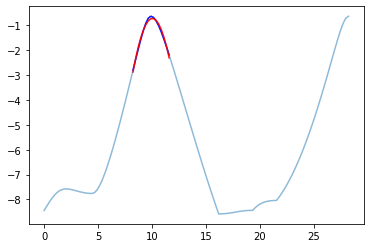

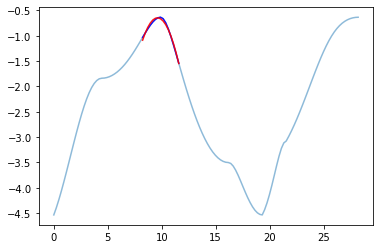

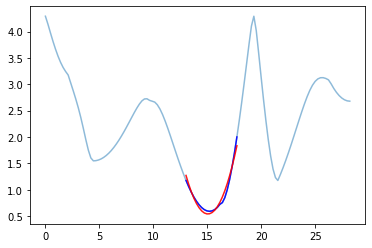

In [7]:
# ------------------- ANSWER TO QUESTION 3 ---------------------------------
#curvefitting to  curve 1
popt1, _ = curve_fit(parabola,kcoords[wav4[0][0]:wav5[0][-1]],curve1)

plt.figure()
plt.plot(kcoords,energies[:,1],alpha = 0.5)
plt.plot(kcoords[wav4[0][0]:wav5[0][-1]],curve1,alpha =0.9,color="b")
plt.plot(kcoords[wav4[0][0]:wav5[0][-1]],parabola(kcoords[wav4[0][0]:wav5[0][-1]],*popt1),alpha = 0.9, color = "r")

#curvefitting to  curve 2
popt2, _ = curve_fit(parabola,kcoords[wav4[0][0]:wav5[0][-1]],curve2)

plt.figure()
plt.plot(kcoords,energies[:,3],alpha = 0.5)
plt.plot(kcoords[wav4[0][0]:wav5[0][-1]],curve2,alpha =0.9,color="b")
plt.plot(kcoords[wav4[0][0]:wav5[0][-1]],parabola(kcoords[wav4[0][0]:wav5[0][-1]],*popt2),alpha = 0.9, color = "r")

#curvefitting to  curve 2
popt3, _ = curve_fit(parabola,kcoords[wav6[0][0]:wav7[0][-1]],curve3)

plt.figure()
plt.plot(kcoords,energies[:,4],alpha = 0.5)
plt.plot(kcoords[wav6[0][0]:wav7[0][-1]],curve3,alpha =0.9,color="b")
plt.plot(kcoords[wav6[0][0]:wav7[0][-1]],parabola(kcoords[wav6[0][0]:wav7[0][-1]],*popt3),alpha = 0.9, color = "r")

#printing the equations for the constants a, b and c for each curve
print("Curve 1 equation is {}x^2 + {}x + {}".format(*popt1))
print("Curve 2 equation is {}x^2 + {}x + {}".format(*popt2))
print("Curve 3 equation is {}x^2 + {}x + {}".format(*popt3))

In [8]:
# ----------------- QUESTION 4 -----------------------------
#determine the band gap using the parobolic fits
#the band gap between curve 1 and curve 2 is presumably zero
#the band gap between curve1/2 and curve 3 has an energy component and a spacial component. 
#calculate the peak of all three parabolas
peak1 = max(parabola(kcoords[wav4[0][0]:wav5[0][-1]],*popt1))
peak2 = max(parabola(kcoords[wav4[0][0]:wav5[0][-1]],*popt2))
peak3 = min(parabola(kcoords[wav6[0][0]:wav7[0][-1]],*popt3))

#calculate average of peaks 1 and 2
peak1_2 = (peak1+peak2)/2

#subtract the peaks to get the band gap
band_gap = abs( abs(peak3) - abs(peak1_2))
print("The energy band  gap is {:.3} eV".format(band_gap))

#calculating k gap
parab1 = parabola(np.linspace(min(kcoords),max(kcoords),num=len(kcoords)),*popt1)
parab2 = parabola(np.linspace(min(kcoords),max(kcoords),num=len(kcoords)),*popt2)
parab3 = parabola(np.linspace(min(kcoords),max(kcoords),num=len(kcoords)),*popt3)
maxindex1 = np.argmax(parab1)
maxindex2 = np.argmax(parab2)
maxindex3 = np.argmin(parab3)

#constants
Armstrong = 10**-10
a_constant=5.43*Armstrong

#calculating K gap
k_gap = abs(abs((kcoords[maxindex1]+kcoords[maxindex2])/2) - abs(kcoords[maxindex3]))
print("The k band gap is {:.3} in units of 1/a where a = {:.3}".format(k_gap,a_constant))

#calculate momentum
hbar = 1.0545*10**(-34)
mom = hbar*(k_gap*(1/a_constant))

#printing the result
print("The momentum of a photon from band gap above is {:.3} kgm/s".format(mom))

The energy band  gap is 0.145 eV
The k band gap is 5.44 in units of 1/a where a = 5.43e-10
The momentum of a photon from band gap above is 1.06e-24 kgm/s


In [28]:
#-------------------Question 5---------------------------------
#determine the effective mass 
#in SI Units the effective mass is given by:
# m = (h^2)/(d^2E/dk^2) where E = energy and k = wavenumber 
alpha = 1/6.24e-19 #known conversion from ev to joules
beta = 1/5.43e-10 #conversion from wavenumber to meters

#mass = ((hbar**2)*alpha)/2*a*beta**2


def mass(a,alpha,beta):
  hbar = 1.0545*10**(-34) 
  return ((hbar**2)*alpha)/2*a*(beta**2)

a = np.array([popt1[0],popt2[0],popt3[0]])
for n in range(0,3):
  masses = mass(a,alpha,beta)

print(masses)

[-2.00699465e-32 -7.02304782e-33  5.39970027e-33]
